# 黄岩的地形图

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning:

(1501, 2001)
(1501, 2001)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(1501, 2001)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


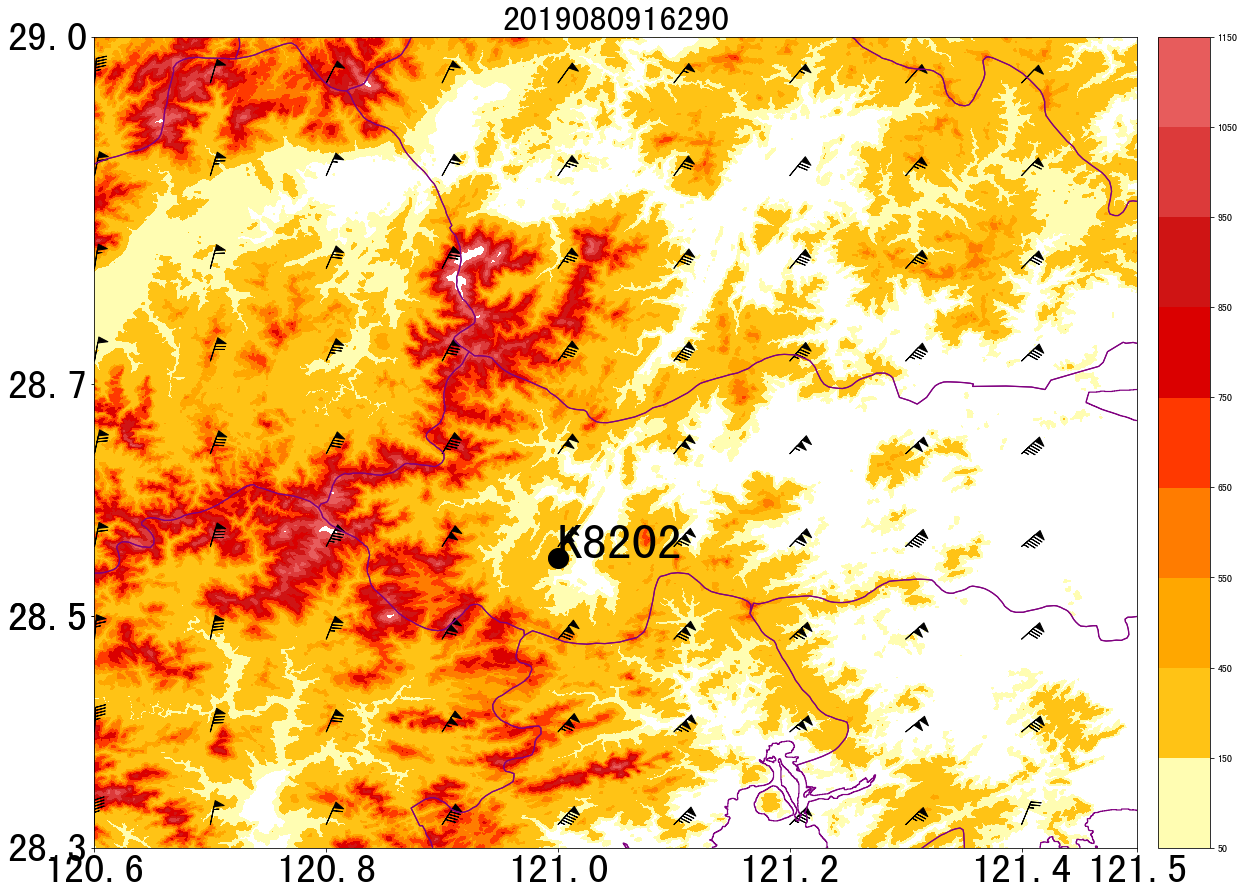

In [2]:
# 局地地形的
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
self_define_list = [130,155,160,165,170,185,200,225,235,240,244]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/taiz.nc')
x =geo.variables['lon']
y = geo.variables['lat']
z=  geo.variables['Band1']


f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')
name ="Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc"
u =f.variables['u'][0,0,:,:]
v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']




box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=120.6,llcrnrlat=28.3,urcrnrlon=121.5,urcrnrlat=29.0)


fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'


# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [50,150,450,550,650,750,850,950,1050,1150]
lons, lats = np.meshgrid(lon[::5], lat[::5])



lons2, lats2 = np.meshgrid(x[::4], y[::4])
print(lons2.shape)
print(lats2.shape)
print(z[::4,::4].shape)
shade = m.contourf(lons2,lats2,z[::4,::4],cmap=cmaps,levels=levels)
m.barbs(lons,lats,u[::5,::5]*2.5, v[::5,::5]*2.5)
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)

m.colorbar(shade)
x1, y1 = m(121.0, 28.55)
plt.plot(x1, y1, 'ok', markersize=20)
plt.text(x1, y1, 'K8202', fontsize=50)

x_val_list=[120.6,120.8,121,121.2,121.4,121.5]
#x_text_list=['80E','100E','120E','140E','160E']
plt.xticks(x_val_list,size = 40)
y_val_list=[28.3,28.5,28.5,28.7,29.0]
# y_text_list=['10S','0','10N','20N','30N','40N','50N']
plt.yticks(y_val_list,size = 40)
# 添加网格线
#ax.grid()
plt.title(name[15:28],fontsize=35,fontweight='bold') 
plt.savefig('wind.png')
plt.savefig('../图片包/黄岩图/'+'地形')
plt.show()


## 自动站风速数据


In [13]:
import pymssql 
import pandas as pd
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码

conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

cursor = conn.cursor() # 获取光标
cursor.execute('USE ZJSZDZDB' )
#sql  = "select IIiii ,MAX(fFy*1000+dFy) AS Expr1 FROM Tab_Aws WHERE (IIiii IN('58665','58559','58568')) AND (tTime BETWEEN '2020-8-14 2:00:01' AND '2020-8-14 05:00:00') GROUP BY IIiii"
sql  = "select IIiii ,MAX(fFy*1000+dFy) AS Expr1 FROM Tab_Aws WHERE (IIiii IN('58665','58559','58568')) AND (tTime BETWEEN '2020-8-14 2:00:01' AND '2020-9-14 05:00:00') GROUP BY IIiii"
cursor.execute(sql) 
#select IIiii ,MAX(fFy*1000+dFy) AS Expr1 FROM Tab_Aws WHERE (IIiii IN('58665','58559','58568','58652')) AND (tTime BETWEEN '2020-7-14 2:00:01' AND '2020-7-14 05:00:00') GROUP BY IIiii
#sql2 = "GO"
#cursor.execute(sql2)
row = cursor.fetchall()
print(row)
print(pd.DataFrame(list(row)).shape)
#connect.commit()  # 提交
cursor.close()  # 关闭游标
conn.close()  # 关闭连接

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


[]
(0, 0)


In [28]:
import pymssql 
import pandas as pd
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

cursor = conn.cursor() # 获取光标

cursor.execute('USE ZJSZDZDB' )

sql  = "select dFy/10.0 from TAB_Mws2019 where (IIiii='K8202' and tTime between '2019-08-09 22:00' and '2019-08-10 04:00') order by tTime"
cursor.execute(sql) 
#select IIiii ,MAX(fFy*1000+dFy) AS Expr1 FROM Tab_Aws WHERE (IIiii IN('58665','58559','58568','58652')) AND (tTime BETWEEN '2020-7-14 2:00:01' AND '2020-7-14 05:00:00') GROUP BY IIiii
#sql2 = "GO"
#cursor.execute(sql2)
row = cursor.fetchall()
print(pd.DataFrame(list(row)).shape)
print(row)
cursor.close()  # 关闭游标
conn.close()  # 关闭连接




(7, 1)
[(Decimal('33.600000'),), (Decimal('34.000000'),), (Decimal('33.000000'),), (Decimal('35.000000'),), (Decimal('32.500000'),), (Decimal('34.000000'),), (Decimal('32.400000'),)]


In [31]:
data = row
print(data)

[(Decimal('33.600000'),), (Decimal('34.000000'),), (Decimal('33.000000'),), (Decimal('35.000000'),), (Decimal('32.500000'),), (Decimal('34.000000'),), (Decimal('32.400000'),)]


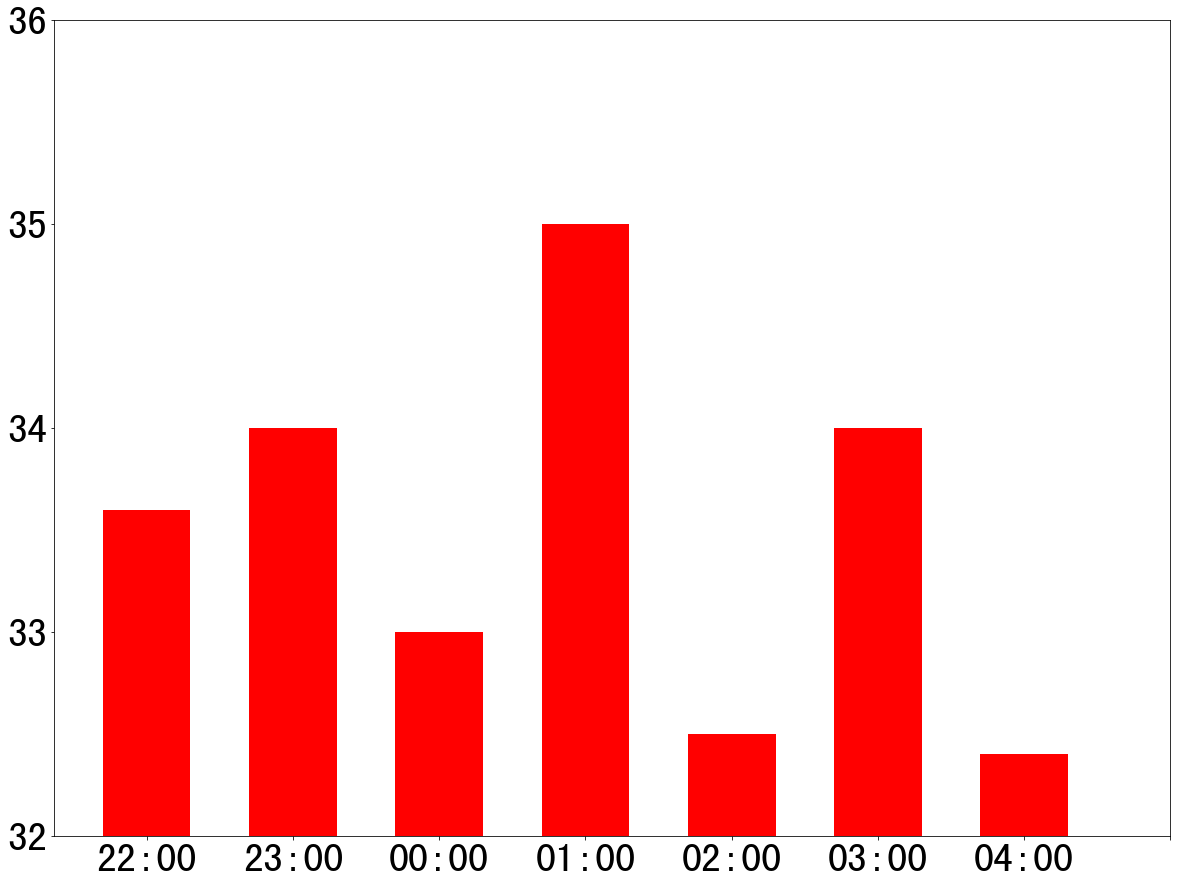

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from pandas import DataFrame,Series
import pandas as pd

fig = plt.figure(figsize=(20, 15))
wind = [33.6,34,33,35,32.5,34,32.4]
x_num = [0,1,2,3,4,5,6,7]
x_ticks = ['22:00','23:00','00:00','01:00','02:00','03:00','04:00']
y_val_list=[32,33,34,35,36]
plt.ylim(32,36)
plt.yticks(y_val_list,size = 40)
plt.bar(range(len(wind)),wind,width=0.6,color = 'red')
plt.xticks(x_num,x_ticks,size = 40)  #设置x轴刻度数据
#x_val_list=['22:00','23:00','00:00','01:00','02:00','03:00','04:00','5:00']

#plt.xticks(x_val_
plt.show()

# #用来正常显示中文标签
# plt.rcParams['font.sans-serif']=['SimHei'] 
# #用来正常显示负号 
# plt.rcParams['axes.unicode_minus']=False
# #1.利用随机函数创建一组随机序列
# series = Series(data)  #数据集累计和

# #利用series默认的index作为x轴数据，series的value作为y轴值
# axes = series.plot(label="折线图",style='ko-')
# axes.set_title("利用Series绘制折线图")
# axes.legend()


In [ ]:
# 山区雷达回波绘制

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


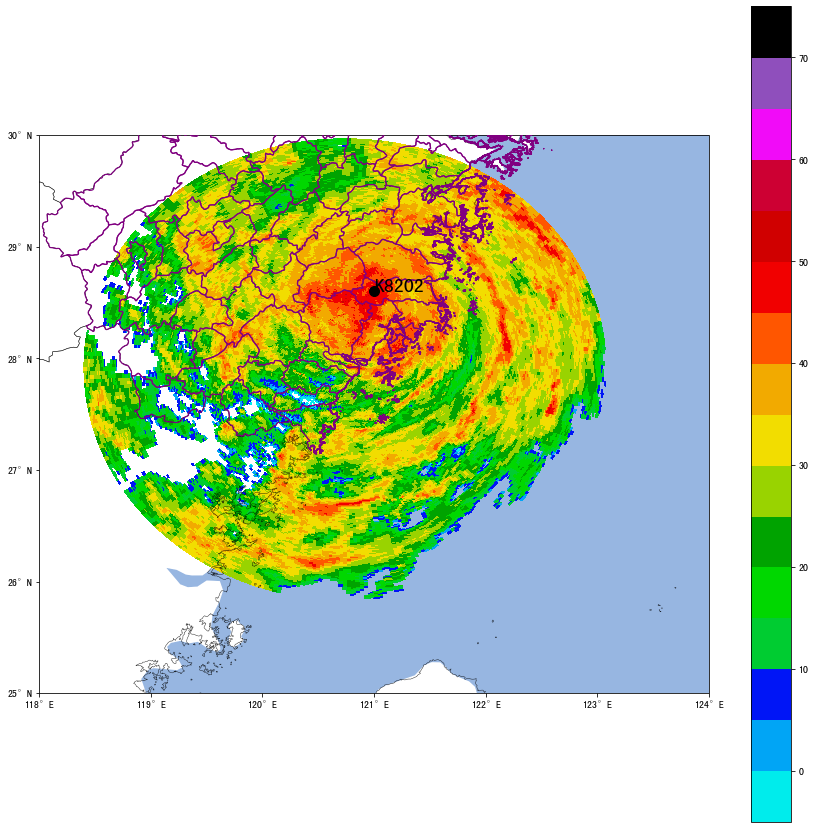

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pycwr.draw.RadarPlot import Graph, GraphMap
%matplotlib inline
from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(15, 15))
path = "/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/09/"
#filename = r"Z_RADR_I_Z9577_20190809173600_O_DOR_SA_CAP.bin.bz2"
filename = r"Z_RADR_I_Z9577_20190809200200_O_DOR_SA_CAP.bin.bz2"
basedata = radar_io(path+filename) 
NRadar = basedata.ToPRD()
ax = plt.axes(projection=ccrs.PlateCarree())
graph = GraphMap(NRadar, ccrs.PlateCarree())
m = Basemap(llcrnrlon=118,llcrnrlat=28.3,urcrnrlon=121.5,urcrnrlat=29.0)

x1, y1 = m(121.0, 28.6)
plt.plot(x1, y1, 'ok', markersize=10,zorder= 10)
plt.text(x1, y1, 'K8202', fontsize=20,zorder= 10)

fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'

m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2,drawbounds=True,zorder= 8)
graph.plot_ppi_map(ax, 0, "dBZ", cmap="pyart_NWSRef")
#ax.set_title("example of PPI with map", fontsize=16)
plt.savefig('../图片包/黄岩图/'+'雷达回波')
plt.show()

<Figure size 432x288 with 0 Axes>

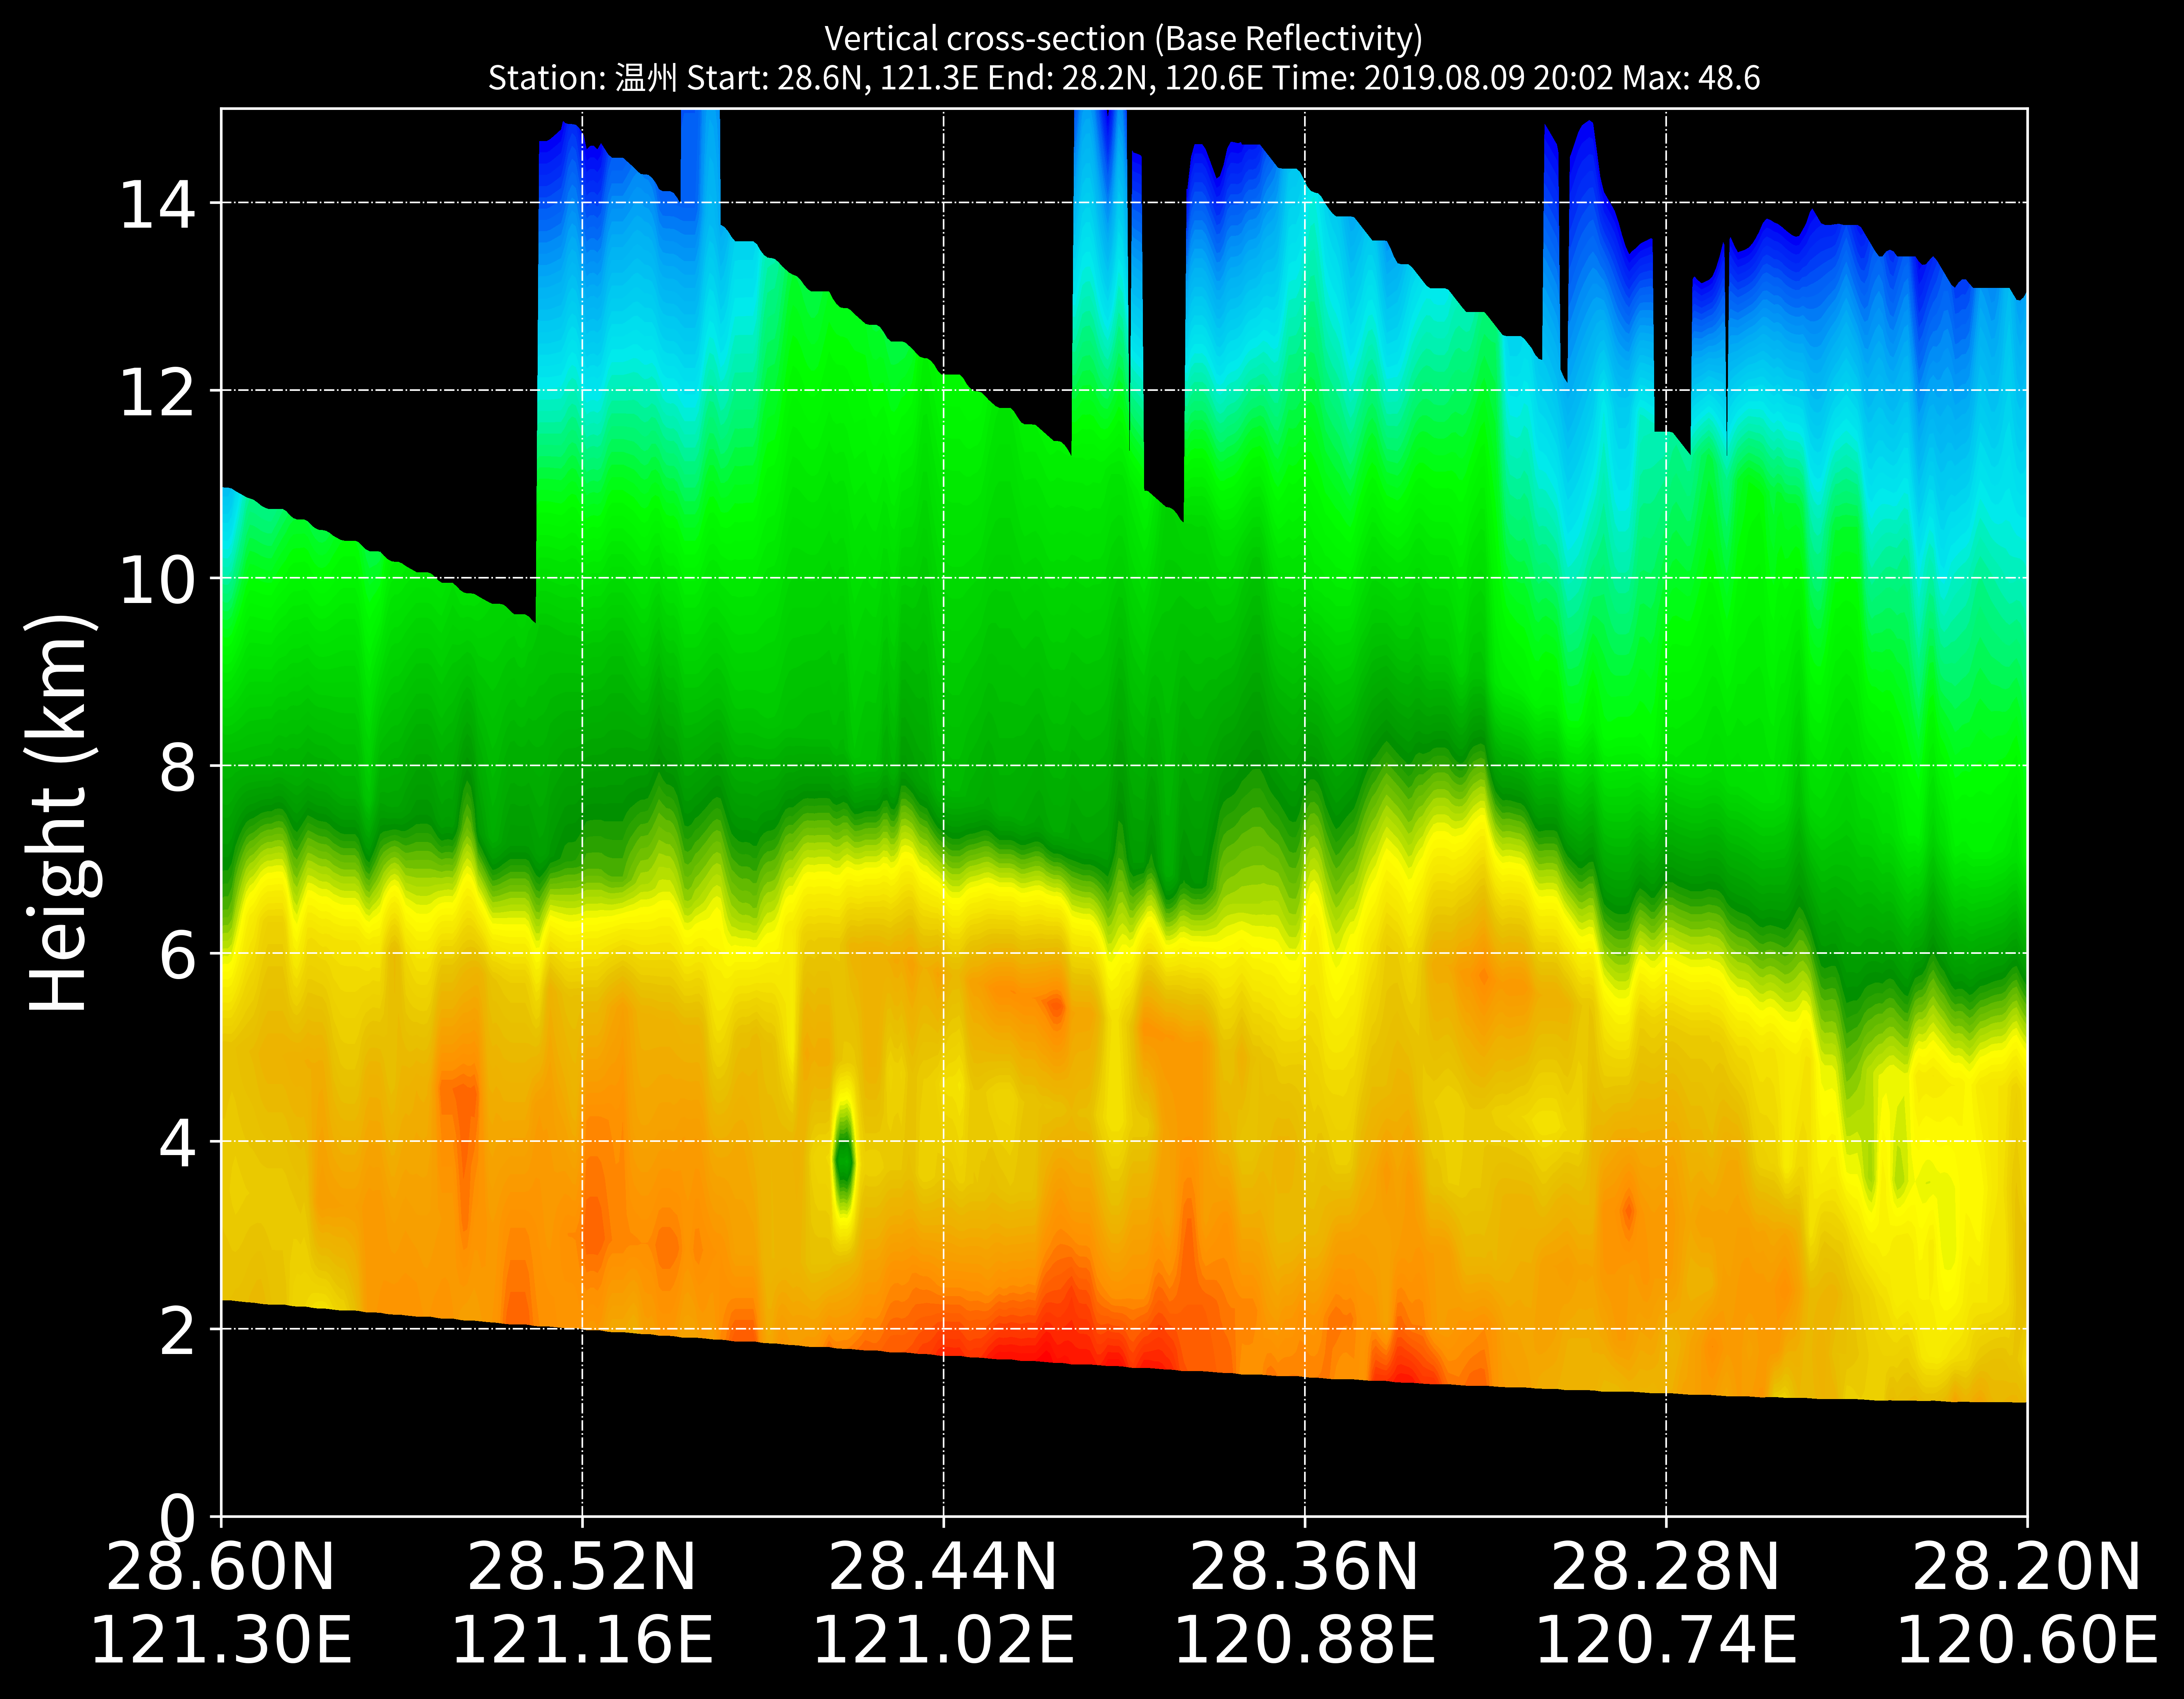

In [7]:
import cinrad
from cinrad.visualize import Section
file = '/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/09/'
#f = cinrad.io.CinradReader(file+'Z_RADR_I_Z9577_20190809173600_O_DOR_SA_CAP.bin.bz2')
f = cinrad.io.CinradReader(file+'Z_RADR_I_Z9577_20190809200200_O_DOR_SA_CAP.bin.bz2')
rl = [f.get_data(i, 230, 'REF') for i in f.angleindex_r]
vcs = cinrad.easycalc.VCS(rl)
# sec = vcs.get_section(start_cart=(111, 25.5), end_cart=(112, 26.7)) # 传入经纬度坐标
sec = vcs.get_section(start_cart=(121.3, 28.6), end_cart=(120.6, 28.2))
fig = Section(sec)
#plt.savefig('../图片包/黄岩图/'+'雷达回波')
plt.savefig('../图片包/黄岩图/'+'雷达坡面')
fig()

# 风速变化特征

In [16]:
import pymssql 
import pandas as pd
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

cursor = conn.cursor() # 获取光标

cursor.execute('USE ZJSZDZDB' )

sql  = "select fFy from TAB_Mws2019 where (IIiii='K8202' and tTime between '2019-08-09 22:00' and '2019-08-10 08:00') order by tTime"
cursor.execute(sql) 
#select IIiii ,MAX(fFy*1000+dFy) AS Expr1 FROM Tab_Aws WHERE (IIiii IN('58665','58559','58568','58652')) AND (tTime BETWEEN '2020-7-14 2:00:01' AND '2020-7-14 05:00:00') GROUP BY IIiii
#sql2 = "GO"
#cursor.execute(sql2)
row = cursor.fetchall()
print(pd.DataFrame(list(row)).shape)
print(row)
cursor.close()  # 关闭游标
conn.close()  # 关闭连接

(11, 1)
[(166,), (191,), (206,), (264,), (286,), (316,), (368,), (306,), (226,), (103,), (81,)]


[16.6, 19.1, 20.6, 26.4, 28.6, 31.6, 36.8, 30.6, 22.6, 10.3, 8.1]


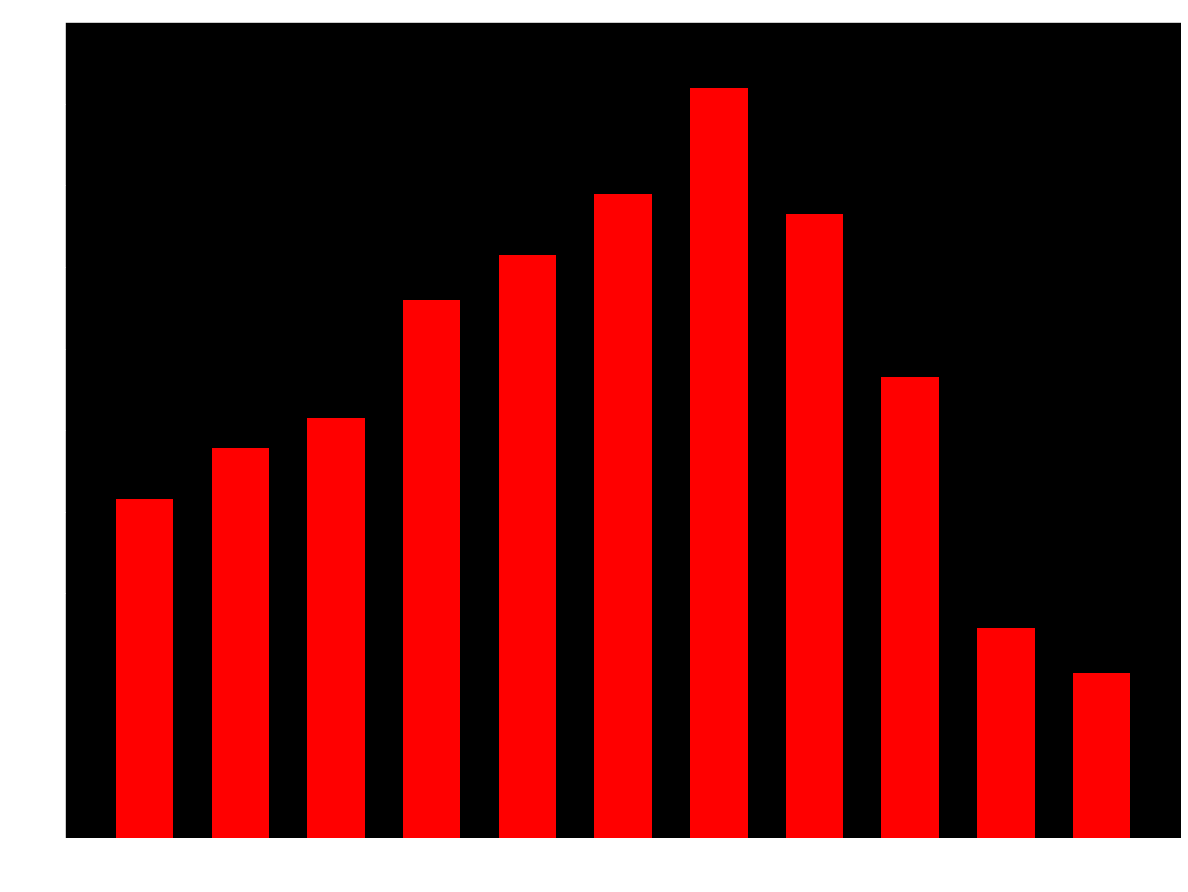

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from pandas import DataFrame,Series
import pandas as pd

fig = plt.figure(figsize=(20, 15))
wind = [16.6,19.1,20.6,26.4,28.6,31.6,36.8,30.6,22.6,10.3,8.1]
print(wind)
x_num = [0,2,4,6,8,10]
x_ticks = ['22:00','00:00','02:00','04:00','06:00','08:00']
y_val_list=[12,16,20,24,28,32,36,40]
plt.ylim(0,36)
plt.yticks(y_val_list,size = 40)
plt.bar(range(len(wind)),wind,width=0.6,color = 'red')
plt.xticks(x_num,x_ticks,size = 40)  #设置x轴刻度数据
#x_val_list=['22:00','23:00','00:00','01:00','02:00','03:00','04:00','5:00']

#plt.xticks(x_val_
plt.savefig('../图片包/黄岩图/'+'风速变化')
plt.show()

# 降水变化特征

In [13]:
import pymssql 
import pandas as pd
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

cursor = conn.cursor() # 获取光标

cursor.execute('USE ZJSZDZDB' )

sql  = "select RR from TAB_Mws2019 where (IIiii='K8202' and tTime between '2019-08-09 22:00' and '2019-08-10 08:00') order by tTime"
cursor.execute(sql) 
#select IIiii ,MAX(fFy*1000+dFy) AS Expr1 FROM Tab_Aws WHERE (IIiii IN('58665','58559','58568','58652')) AND (tTime BETWEEN '2020-7-14 2:00:01' AND '2020-7-14 05:00:00') GROUP BY IIiii
#sql2 = "GO"
#cursor.execute(sql2)
row = cursor.fetchall()
print(pd.DataFrame(list(row)).shape)
print(row)
cursor.close()  # 关闭游标
conn.close()  # 关闭连接

(11, 1)
[(105,), (45,), (113,), (72,), (73,), (250,), (397,), (625,), (295,), (90,), (34,)]


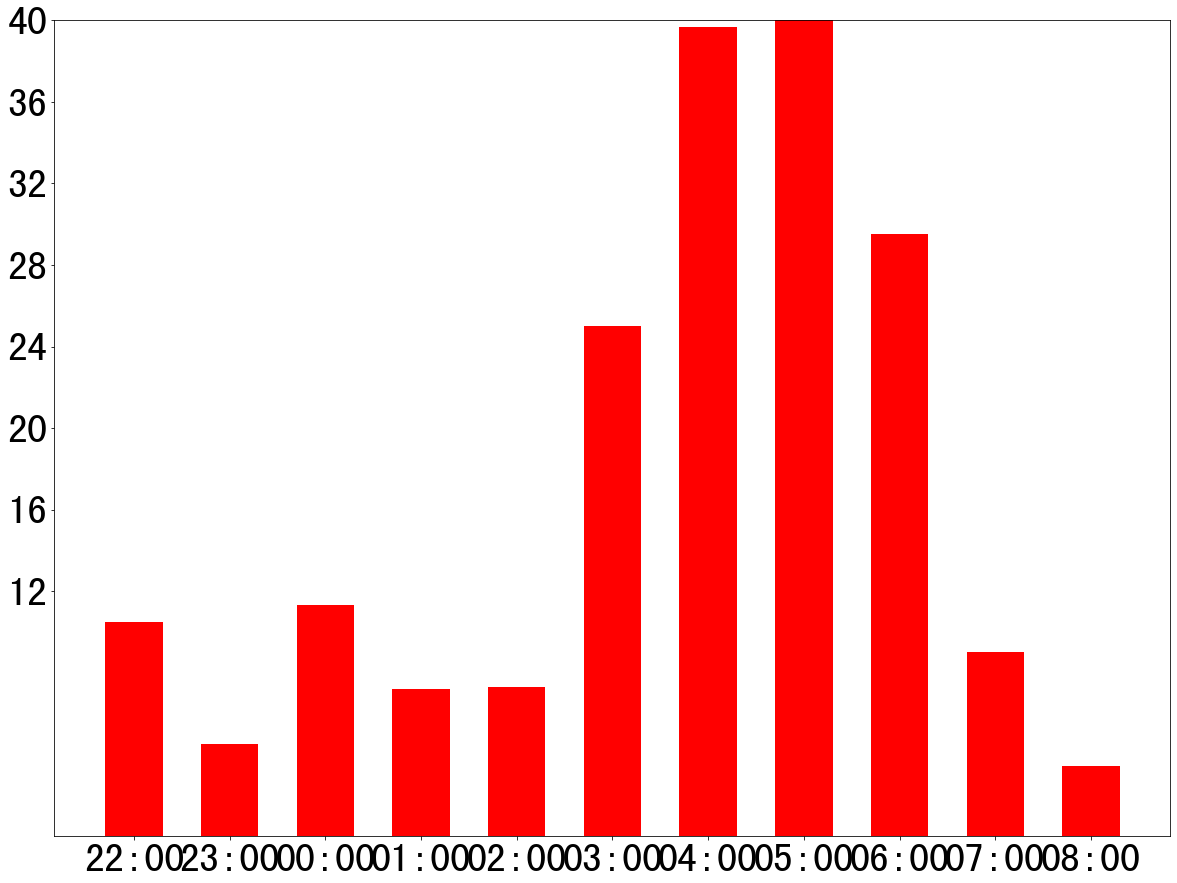

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from pandas import DataFrame,Series
import pandas as pd

fig = plt.figure(figsize=(20, 15))
wind = [10.5,4.5,11.3,7.2,7.3,25.0,39.7,62.5,29.5,9.0,3.4]
x_num = [0,1,2,3,4,5,6,7,8,9,10]
x_ticks = ['22:00','23:00','00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00']
y_val_list=[12,16,20,24,28,32,36,40]
plt.ylim(0,36)
plt.yticks(y_val_list,size = 40)
plt.bar(range(len(wind)),wind,width=0.6,color = 'red')
plt.xticks(x_num,x_ticks,size = 40)  #设置x轴刻度数据
#x_val_list=['22:00','23:00','00:00','01:00','02:00','03:00','04:00','5:00']

#plt.xticks(x_val_
plt.show()